## Reading jsons

In [38]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
#mpl.rcParams['figure.dpi'] = 800
#mpl.rcParams['figure.figsize'] = [60, 60]

import pandas as pd
import os,json

## Read file names
path_to_json = '.'
times_files = [pos_json for pos_json in os.listdir(path_to_json) if pos_json.endswith('_time.json')]
compact_time_files = [pos_json for pos_json in os.listdir(path_to_json) if pos_json.endswith('_time_compact.json')]
mem_files = [pos_json for pos_json in os.listdir(path_to_json) if pos_json.endswith('_mem.json')]


## Read json of no compact files
data_to_append = []
for js in times_files:
    data_to_append.append(pd.read_json(js, typ='series', orient='index'))

##Concat all dataframe and transpose it
data_time = pd.concat(data_to_append, axis=1)
data_time = data_time.transpose()

## Read json of compact files
compact_data_to_append = []
for js in compact_time_files:
    compact_data_to_append.append(pd.read_json(js, typ='series', orient='index'))

##Concat all dataframe and transpose it
data_time_compact = pd.concat(compact_data_to_append, axis=1)
data_time_compact = data_time_compact.transpose()

mem_data_to_append = []
for js in mem_files:
    mem_data_to_append.append(pd.read_json(js, typ='series', orient='index'))

##Concat all dataframe and transpose it
data_mem = pd.concat(mem_data_to_append, axis=1)
data_mem = data_mem.transpose()

#data_time = pd.DataFrame(columns=['time_triangulation_generation','time_to_label_max_edges', 'time_to_label_frontier_edges', 'time_to_label_seed_edges', 'time_to_traversal_and_repair', 'time_to_traversal', 'time_to_repair', 'polygons', 'n_frontier_edges', 'n_barrier_edge_tips', 'n_half_edges', 'n_faces', 'n_vertices'])
data_time['Polylla_time'] = data_time['time_to_label_max_edges'] + data_time['time_to_label_frontier_edges'] + data_time['time_to_label_seed_edges'] + data_time['time_to_traversal_and_repair']
data_time_compact['Polylla_time'] = data_time_compact['time_to_label_max_edges'] + data_time_compact['time_to_label_frontier_edges'] + data_time_compact['time_to_label_seed_edges'] + data_time_compact['time_to_traversal_and_repair']


# Time comparision

## Comp time triangulation generation

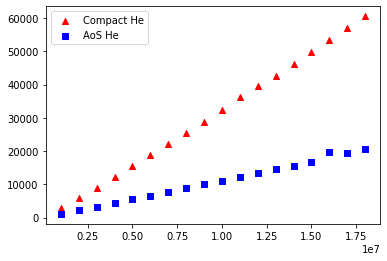

In [39]:
#data_time.columns.to_list()
plt.scatter(data_time_compact.n_vertices, data_time_compact.time_triangulation_generation, c="red",marker="^", label='Compact He')
plt.scatter(data_time.n_vertices, data_time.time_triangulation_generation,c="blue" ,marker="s",  label='AoS He')
plt.legend()

## Comptime Polylla generation

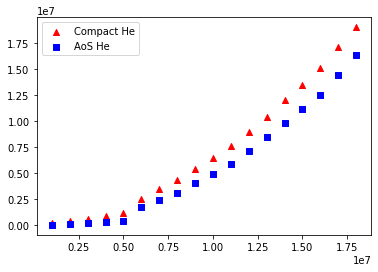

In [40]:
#data_time.columns.to_list()
plt.scatter(data_time_compact.n_vertices, data_time_compact.Polylla_time, c="red",marker="^", label='Compact He')
plt.scatter(data_time.n_vertices, data_time.Polylla_time, c="blue" ,marker="s",  label='AoS He')

plt.legend()
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

# Polylla phases time comp

## label max edges

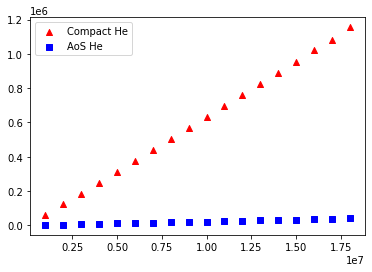

In [41]:
#data_time.columns.to_list()
plt.scatter(data_time_compact.n_vertices, data_time_compact.time_to_label_max_edges, c="red",marker="^", label='Compact He')
plt.scatter(data_time.n_vertices, data_time.time_to_label_max_edges, c="blue" ,marker="s",  label='AoS He')

plt.legend()
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

## label frontier edges

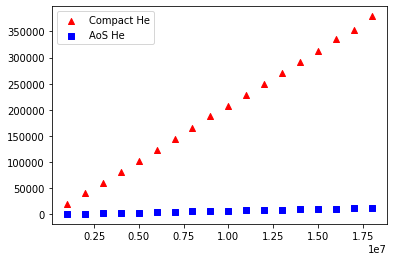

In [42]:
plt.scatter(data_time_compact.n_vertices, data_time_compact.time_to_label_frontier_edges, c="red",marker="^", label='Compact He')
plt.scatter(data_time.n_vertices, data_time.time_to_label_frontier_edges, c="blue" ,marker="s",  label='AoS He')

plt.legend()
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

## label seed edges

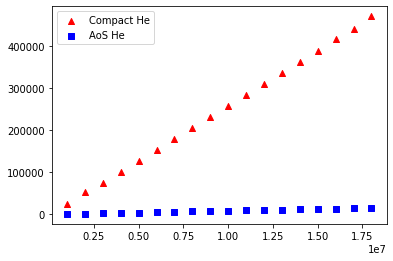

In [43]:
plt.scatter(data_time_compact.n_vertices, data_time_compact.time_to_label_seed_edges, c="red",marker="^", label='Compact He')
plt.scatter(data_time.n_vertices, data_time.time_to_label_seed_edges, c="blue" ,marker="s",  label='AoS He')

plt.legend()
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

## traversal

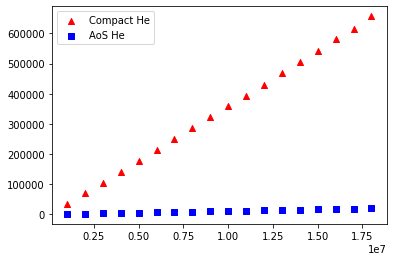

In [44]:
plt.scatter(data_time_compact.n_vertices, data_time_compact.time_to_traversal, c="red",marker="^", label='Compact He')
plt.scatter(data_time.n_vertices, data_time.time_to_traversal, c="blue" ,marker="s",  label='AoS He')

plt.legend()
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

## Repair

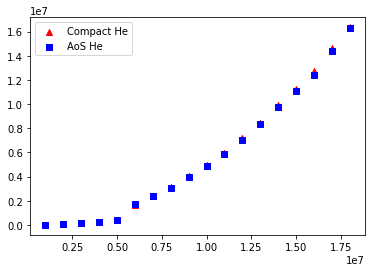

In [45]:
plt.scatter(data_time_compact.n_vertices, data_time_compact.time_to_repair, c="red",marker="^", label='Compact He')
plt.scatter(data_time.n_vertices, data_time.time_to_repair, c="blue" ,marker="s",  label='AoS He')

plt.legend()
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

# Memory comp

## Mem Comp triangulation

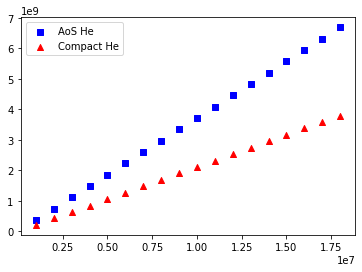

In [46]:
#long long mem_triangulation, mem_polylla, mem_compact_triangulation, mem_compact_polylla;
#long long mem_gen_triangulation, mem_gen_polylla, mem_gen_compact_triangulation, mem_gen_compact_polylla;
#long num_vertices, num_triangles, num_halfedges;

plt.scatter(data_mem.num_vertices, data_mem.mem_triangulation, c="blue" ,marker="s",  label='AoS He')
plt.scatter(data_mem.num_vertices, data_mem.mem_compact_triangulation, c="red",marker="^", label='Compact He')
plt.legend()
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

## Mem comp gen triangulation

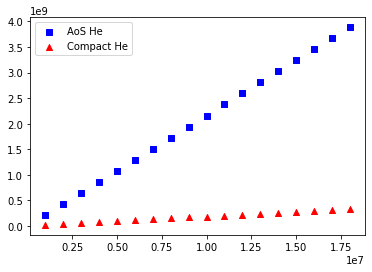

In [47]:
plt.scatter(data_mem.num_vertices, data_mem.mem_gen_triangulation, c="blue" ,marker="s",  label='AoS He')
plt.scatter(data_mem.num_vertices, data_mem.mem_gen_compact_triangulation, c="red",marker="^", label='Compact He')
plt.legend()
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))